In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Обработка результатов

## **Изучение полученных результатов из УМ**

In [2]:
def get_result(config:str,
               way_type:str,
               fault:str,
               speed:int,
               profile:str = "gost") ->pd.DataFrame:
    """
    Получение результатов расчетов по ключевым словам
    1. `config` принимает два вида строк `empty` и `loaded`
    2. `way_type` принимает три вида строк `straight`, `curve_350` и `curve_650`
    3. `fault` принимает три вида строк `normal`, `polzun15`, `ellips10`
    4. `speed` от 10 до 60 км/ч
    5. `profile` есть профили `gost`, `newwagonw`, `greb_26`, `greb_30`, `greb_28`
    """
    dictionary = {"curve_350":{20:55,
                               30:39,
                               40:28,
                               50:24,
                               60:19},
                }
    if config == "empty":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\empty"
    
    elif config == "loaded":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\loaded"
    
    name = "\\"+config+"_"+way_type+"_"+fault+"_"+str(speed)+"_"+profile+".csv"

    l_name = len(name)

    FULL_PATH = PATH+name

    file = pd.read_csv(FULL_PATH,encoding='latin-1')

    COL_NAMES = ["time_step",name[1:l_name-4]]

    file.columns = COL_NAMES

    file = file.set_index("time_step")

    if config == "curve_350":
        file = file[file.index<dictionary["curve_350"][speed]]

    
    return file


In [3]:
def get_profile_results(config:str,
                        way_type:str,
                        fault:str,
                        speed:int):
    """Результаты расчета по всем видам профилей"""
    file1 = get_result(config, way_type,fault,speed)
    file2 = get_result(config, way_type,fault,speed, "greb_26")
    file3 = get_result(config, way_type,fault,speed, "greb_28")
    file4 = get_result(config, way_type,fault,speed, "greb_30")
    file5 = get_result(config, way_type,fault,speed, "newwagonw")

    return file1,file2,file3,file4,file5

In [4]:
def plot_profile_results(config:str,way_type:str,fault:str,speed:int):
    """Создание графика сравнения результатов с разным профилем колес"""
    d={"loaded":"Груженый",
       "empty":"Порожний",
       "straight":"прямая",
       "curve_350":"кривая 350 м",
       "curve_650":"кривая 650 м",
       "normal":"без неисправностей",
       "polzun15":"ползун",
       "ellips10":"неравномерный прокат"}
    
   #  sns.set (rc={' axes.facecolor':'#C0C0C0', 'figure.facecolor':'#FFFFF0 '})
    
    files = get_profile_results(config, way_type,fault,speed)
    FILE = pd.concat(files,axis=1)
    FILE.columns = ["gost","greb_26","greb_28","greb_30","newwagonw"]

    plt.figure(figsize=(12,8))
    plt.grid(True)
    sns.lineplot(FILE)
    plt.title(f"{d[config]} вагон, {d[way_type]}, {d[fault]} скорость {speed} км/ч ")
    plt.xlabel("Время, с")
    plt.ylabel("Вертикальная сила, Н")
    plt.show()
    



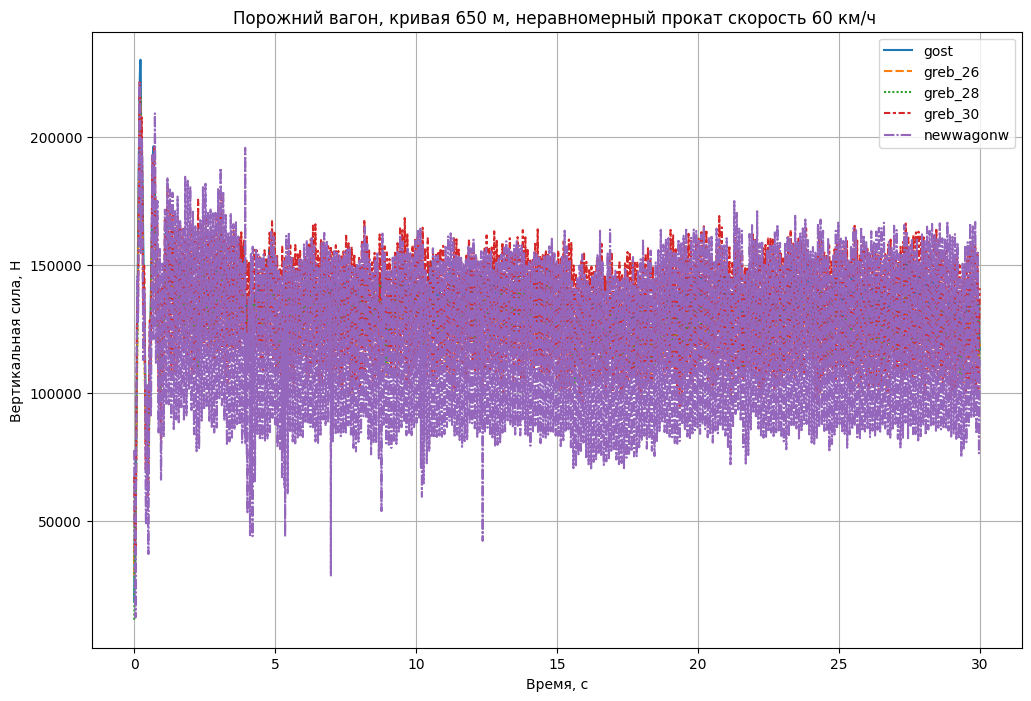

In [5]:
plot_profile_results("empty","curve_650","ellips10",60)

In [6]:
empty_straight_normal_10 = get_result("empty","straight","normal",10)
empty_straight_normal_10.head()

,empty_straight_normal_10_gost
time_step,
0.000000,29575.992
0.005109,32467.777
0.010109,35095.023
0.015109,38440.480
0.020109,41884.520


In [7]:
empty_straight_normal_20 = get_result("empty","straight","normal",20)
empty_straight_normal_20.head()

,empty_straight_normal_20_gost
time_step,
0.000000,29575.992
0.005109,32136.971
0.010109,35086.570
0.015109,39165.609
0.020109,43360.832


In [8]:
def get_speed_results(config:str,
                      way_type:str,
                      fault:str,
                      profile:str = "gost") -> list[pd.DataFrame]:
    speed = [i for i in range(10,70,10)]

    results = []

    for v in speed:
        file = get_result(config,way_type,fault,profile=profile,speed=v)
        results.append(file)
    
    return results

In [9]:
wagon_cfg = ["empty","loaded"]
way_cfg = ["straight","curve_350","curve_650"]

d = {}

for wagon in wagon_cfg:
    d[wagon] = {}
    for way in way_cfg:
        d[wagon][way] = 0

print(d)

{'empty': {'straight': 0, 'curve_350': 0, 'curve_650': 0}, 'loaded': {'straight': 0, 'curve_350': 0, 'curve_650': 0}}


In [10]:
wagon_cfg = ["empty","loaded"]
way_cfg = ["straight","curve_350","curve_650"]
wheel_cfg = ["gost", "greb_26","greb_28","greb_30","newwagonw"]
fault_cfg = ["normal","polzun15","ellips10"]

def get_full_calculations(wagon_cfg:list,
                          way_cfg:list,
                          wheel_cfg:list,
                          fault_cfg:list) -> dict:
    
    gen_dict = {}
    

    for wagon in wagon_cfg:
        gen_dict[wagon] = {}
        for way in way_cfg:
            gen_dict[wagon][way] = {}
            for fault in fault_cfg:   
                gen_dict[wagon][way][fault] = {}
                for wheel in wheel_cfg:
                    print(f"{wagon}\n{way}\n{fault}\n{wheel}\n------")
                    gen_dict[wagon][way][fault][wheel] = get_speed_results(wagon,way,fault,wheel)
    
    return gen_dict

In [11]:
ALL_CALCULATIONS = get_full_calculations(wagon_cfg,way_cfg,wheel_cfg,fault_cfg)

empty
straight
normal
gost
------
empty
straight
normal
greb_26
------
empty
straight
normal
greb_28
------
empty
straight
normal
greb_30
------
empty
straight
normal
newwagonw
------
empty
straight
polzun15
gost
------
empty
straight
polzun15
greb_26
------
empty
straight
polzun15
greb_28
------
empty
straight
polzun15
greb_30
------
empty
straight
polzun15
newwagonw
------
empty
straight
ellips10
gost
------
empty
straight
ellips10
greb_26
------
empty
straight
ellips10
greb_28
------
empty
straight
ellips10
greb_30
------
empty
straight
ellips10
newwagonw
------
empty
curve_350
normal
gost
------
empty
curve_350
normal
greb_26
------
empty
curve_350
normal
greb_28
------
empty
curve_350
normal
greb_30
------
empty
curve_350
normal
newwagonw
------
empty
curve_350
polzun15
gost
------
empty
curve_350
polzun15
greb_26
------
empty
curve_350
polzun15
greb_28
------
empty
curve_350
polzun15
greb_30
------
empty
curve_350
polzun15
newwagonw
------
empty
curve_350
ellips10
gost
------
emp

In [12]:
ALL_CALCULATIONS["loaded"]['straight']['ellips10']['gost']

[           loaded_straight_ellips10_10_gost
 time_step                                  
 0.000000                          18932.619
 0.005047                          24015.994
 0.010047                          32330.969
 0.015047                          40676.207
 0.020047                          45764.238
 ...                                     ...
 4.980047                         144712.160
 4.985047                         144815.590
 4.990047                         145342.860
 4.995047                         145668.580
 5.000047                         145938.560
 
 [1001 rows x 1 columns],
            loaded_straight_ellips10_20_gost
 time_step                                  
 0.000000                          18932.619
 0.005109                          24231.982
 0.010109                          33657.520
 0.015109                          43047.355
 0.020109                          48971.945
 ...                                     ...
 4.980109                  

## **Подготовка инфы для разделения на кастомные фолды**

Так как колесо по ГОСТ имеет радиус 475 мм, то полный оборот колеса fold = 2*pi*475

Тогда время прохождения полного оборота колеса будет равно t = fold/v 

In [13]:
def time_split(v:int) -> int:
    """Определение временного промежутка полного оборота колеса
    1. v - скорость движения поезда, км/ч
    """
    speed = v/3.6
    lenght = 2*np.pi*0.475
    t = lenght/speed
    return t

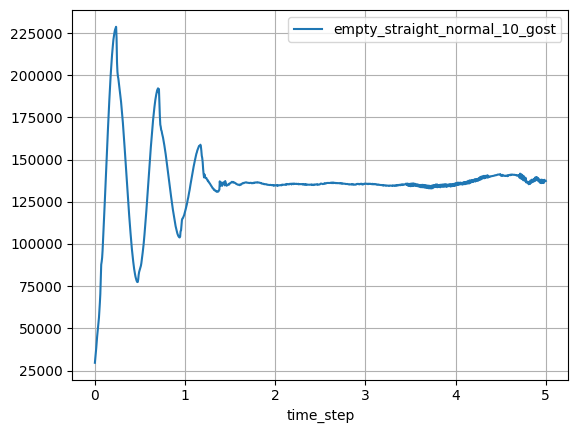

In [14]:
plt.grid(True)
sns.lineplot(ALL_CALCULATIONS["empty"]["straight"]["normal"]["gost"][0])
plt.show()

In [15]:
def get_time_splits(data:pd.DataFrame) -> list:
    """Возвращает индексы по которым нужно производить обрез
    Индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = []

    start_point = 1.4

    time_max_point = data.index.max()               # Максимальное время

    if data.columns[0].split("_")[1] == "straight":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[3])) # 1.007 сек

    elif data.columns[0].split("_")[1] == "curve":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[4])) # 1.007 сек
        
    num_folds = (time_max_point-1)//wheel_rotate_num    # Сколько всего фолдов получится сделать

    res.append(start_point)

    for _ in range(int(num_folds)):
        start_point+= wheel_rotate_num
        res.append(start_point)

    return res

In [16]:
def time_indexes(frames:list[pd.DataFrame]) -> dict:
    """Возвращает словарь индексов по которым нужно производить обрез, где
    индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = {}

    for n in range(len(frames)):
        str = frames[n].columns[0].split("_")
        for s in str:
            if s.isdigit():
                if int(s) != 350 and int(s) != 650:
                    name = s

                    res[name] = get_time_splits(frames[n])
    
    return res

In [17]:
def get_all_time_indexes(calculations:dict[dict[dict[dict[list[pd.DataFrame]]]]]) -> dict:
    

    wagon_cfg = calculations.keys()
    way_cfg = calculations["empty"].keys()
    fault_cfg = calculations["empty"]["straight"].keys()
    wheel_cfg = calculations["empty"]["straight"]["normal"].keys()


    gen_dict = {}
    

    for wagon in wagon_cfg:
        gen_dict[wagon] = {}

        for way in way_cfg:
            gen_dict[wagon][way] = {}

            for fault in fault_cfg:   
                gen_dict[wagon][way][fault] = {}
                
                for wheel in wheel_cfg:
                    print(f"{wagon}\n{way}\n{fault}\n{wheel}\n------")
                    gen_dict[wagon][way][fault][wheel] = time_indexes(calculations[wagon][way][fault][wheel])
    
    return gen_dict

ALL_TIME_INDEXES = get_all_time_indexes(ALL_CALCULATIONS)

empty
straight
normal
gost
------
empty
straight
normal
greb_26
------
empty
straight
normal
greb_28
------
empty
straight
normal
greb_30
------
empty
straight
normal
newwagonw
------
empty
straight
polzun15
gost
------
empty
straight
polzun15
greb_26
------
empty
straight
polzun15
greb_28
------
empty
straight
polzun15
greb_30
------
empty
straight
polzun15
newwagonw
------
empty
straight
ellips10
gost
------
empty
straight
ellips10
greb_26
------
empty
straight
ellips10
greb_28
------
empty
straight
ellips10
greb_30
------
empty
straight
ellips10
newwagonw
------
empty
curve_350
normal
gost
------
empty
curve_350
normal
greb_26
------
empty
curve_350
normal
greb_28
------
empty
curve_350
normal
greb_30
------
empty
curve_350
normal
newwagonw
------
empty
curve_350
polzun15
gost
------
empty
curve_350
polzun15
greb_26
------
empty
curve_350
polzun15
greb_28
------
empty
curve_350
polzun15
greb_30
------
empty
curve_350
polzun15
newwagonw
------
empty
curve_350
ellips10
gost
------
emp

In [18]:
def get_splitted_dataframe(data:pd.DataFrame,indexes:list) -> pd.DataFrame:
    """Разделение одного результата расчета на несколько других по полному обороту колеса
    1. `data` - датафрейм с расчетом
    2. `indexes` - индексы по которым нужно делить расчет"""
    
    zeros = np.zeros((214,1))
    common_df = pd.DataFrame(zeros)

    for i in range(len(indexes)):
        if i < len(indexes) - 1:
            seq = data[(data.index>=indexes[i]) & (data.index<=indexes[i+1])]  # срез по точкам
        else:
            seq = data[data.index>indexes[i]]
        common_df = pd.concat([common_df,seq], axis=1)
    
    df = common_df.drop(0, axis=1)
    num_cols = len(df.columns)

    df.columns = [[data.columns[0] for i in range(num_cols)],[i for i in range(num_cols)]]
    
    return df       

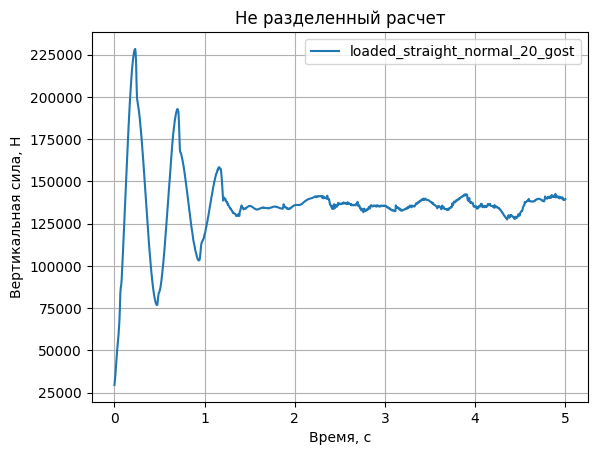

In [19]:
plt.grid(True)
sns.lineplot(ALL_CALCULATIONS["loaded"]["straight"]["normal"]["gost"][1])
plt.title("Не разделенный расчет")
plt.ylabel("Вертикальная сила, Н")
plt.xlabel("Время, с")
plt.show()

**Пример разделения расчета на несколько мелких по обороту колеса**

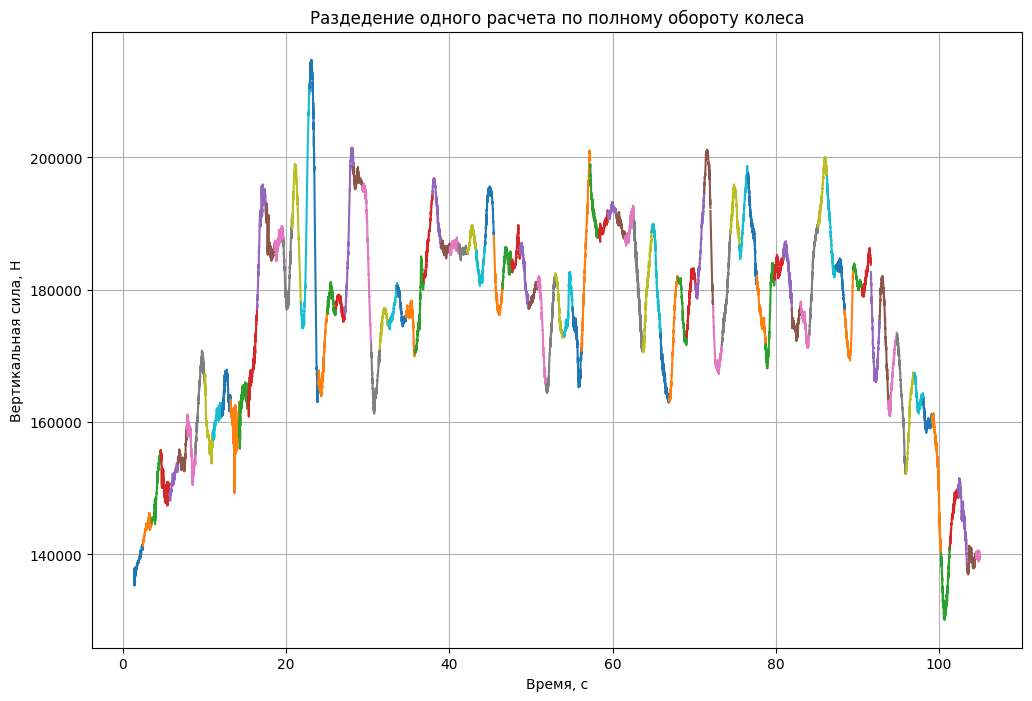

In [20]:
devided_result = get_splitted_dataframe(ALL_CALCULATIONS["loaded"]["curve_350"]["normal"]["gost"][0],
                                       ALL_TIME_INDEXES["loaded"]["curve_350"]["normal"]["gost"]["10"])

devided_result_ = get_splitted_dataframe(ALL_CALCULATIONS["loaded"]["curve_650"]["normal"]["gost"][0],
                                       ALL_TIME_INDEXES["loaded"]["curve_650"]["normal"]["gost"]["10"])

plt.figure().set_size_inches(12,8)
plt.grid(True)
plt.plot(devided_result)
plt.ylabel("Вертикальная сила, Н")
plt.xlabel("Время, с")
plt.title("Раздедение одного расчета по полному обороту колеса")
plt.show()

In [21]:
from scipy.stats import skew, kurtosis

def get_skew_kurt(data:pd.DataFrame):
    cols = data.columns

    skews = []
    kurtosises = []

    for i in cols:
        skew_ = skew(data[i].dropna().to_numpy())
        kurt_ = kurtosis(data[i].dropna().to_numpy())
        skews.append(skew_)
        kurtosises.append(kurt_)
    
    return pd.DataFrame({"skew":skews,"kurt":kurtosises}, index=cols).T

In [22]:
def get_description(data:pd.DataFrame) -> pd.DataFrame:
    """Получаем описанный фрейм и к нему добавляем доп фичи"""
    
    summ = data.sum()
    variance = data.var()
    skew_kurt = get_skew_kurt(data)
    desc = data.describe()

    summ_var = pd.concat([variance,summ],axis=1).T
    summ_var.index = ["var","sum"]
   
    df = pd.concat([desc,summ_var,skew_kurt], axis=0)
    return df

In [26]:
from IPython.display import clear_output

def make_frame_from_splits(calculations:dict,time_indexes:dict) -> pd.DataFrame:
    
    wagon_cfg = calculations.keys()
    way_cfg = calculations["empty"].keys()
    fault_cfg = calculations["empty"]["straight"].keys()
    wheel_cfg = calculations["empty"]["straight"]["normal"].keys()
    speed_cfg = time_indexes["empty"]["straight"]["normal"]["gost"].keys()
    lenght = len(calculations["empty"]["straight"]["normal"]["gost"])
    
    zeros = np.zeros((12,1))
    common_df = pd.DataFrame(zeros)

    n = 0

    for wagon in wagon_cfg:
        for way in way_cfg:
            for fault in fault_cfg:
                for wheel in wheel_cfg:
                    for l,speed in zip(range(lenght),speed_cfg):
                        
                        splitted_df = get_splitted_dataframe(calculations[wagon][way][fault][wheel][l],
                                                            time_indexes[wagon][way][fault][wheel][speed])
                        
                        feats = get_description(splitted_df)

                        common_df = pd.concat([common_df,feats], axis=1)

                        clear_output(wait=True)
                        print(f"Сделано: {n}")
                        n+=1
                       
    
    df = common_df.drop(index=[i for i in range(12)]).drop(0,axis=1)

    return df                   

In [24]:
test = ALL_CALCULATIONS["empty"]["curve_350"]["normal"]["greb_30"][0]

In [27]:
make_frame_from_splits(ALL_CALCULATIONS,ALL_TIME_INDEXES)

Сделано: 539


,"(empty_straight_normal_10_gost, 0)","(empty_straight_normal_10_gost, 1)","(empty_straight_normal_10_gost, 2)","(empty_straight_normal_10_gost, 3)","(empty_straight_normal_20_gost, 0)","(empty_straight_normal_20_gost, 1)","(empty_straight_normal_20_gost, 2)","(empty_straight_normal_20_gost, 3)","(empty_straight_normal_20_gost, 4)","(empty_straight_normal_20_gost, 5)",...,"(loaded_curve_650_ellips10_60_newwagonw, 152)","(loaded_curve_650_ellips10_60_newwagonw, 153)","(loaded_curve_650_ellips10_60_newwagonw, 154)","(loaded_curve_650_ellips10_60_newwagonw, 155)","(loaded_curve_650_ellips10_60_newwagonw, 156)","(loaded_curve_650_ellips10_60_newwagonw, 157)","(loaded_curve_650_ellips10_60_newwagonw, 158)","(loaded_curve_650_ellips10_60_newwagonw, 159)","(loaded_curve_650_ellips10_60_newwagonw, 160)","(loaded_curve_650_ellips10_60_newwagonw, 161)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Идея с преобразованием Фурье, как доп фичи**

In [ ]:
# Все разделенные расчеты
# Много кода по обработке каждого расчета
# ...

**Описание данных фолдов**

In [ ]:
loaded_calculations = [loaded_straight_normal_gost,
                       loaded_straight_normal_greb_26,
                       loaded_straight_normal_greb_28,
                       loaded_straight_normal_greb_30,
                       loaded_curve_350_normal_gost,
                       loaded_curve_350_normal_greb_26,
                       loaded_curve_350_normal_greb_28,
                       loaded_curve_350_normal_greb_30,
                       loaded_curve_650_normal_gost,
                       loaded_curve_650_normal_greb_26,
                       loaded_curve_650_normal_greb_28,
                       loaded_curve_650_normal_greb_30,
                       loaded_straight_polzun15_gost,
                       loaded_straight_polzun15_greb_26,
                       loaded_straight_polzun15_greb_28,
                       loaded_straight_polzun15_greb_30,
                       loaded_curve_350_polzun15_gost,
                       loaded_curve_350_polzun15_greb_26,
                       loaded_curve_350_polzun15_greb_28,
                       loaded_curve_350_polzun15_greb_30,
                       loaded_curve_650_polzun15_gost,
                       loaded_curve_650_polzun15_greb_26,
                       loaded_curve_650_polzun15_greb_28,
                       loaded_curve_650_polzun15_greb_30,
                       loaded_straight_ellips10_gost,
                       loaded_straight_ellips10_greb_26,
                       loaded_straight_ellips10_greb_28,
                       loaded_straight_ellips10_greb_30,
                       loaded_curve_350_ellips10_gost,
                       loaded_curve_350_ellips10_greb_26,
                       loaded_curve_350_ellips10_greb_28,
                       loaded_curve_350_ellips10_greb_30,
                       loaded_curve_650_ellips10_gost,
                       loaded_curve_650_ellips10_greb_26,
                       loaded_curve_650_ellips10_greb_28,
                       loaded_curve_650_ellips10_greb_30]

empty_calculations = [empty_straight_normal_gost,
                       empty_straight_normal_greb_26,
                       empty_straight_normal_greb_28,
                       empty_straight_normal_greb_30,
                       empty_curve_350_normal_gost,
                       empty_curve_350_normal_greb_26,
                       empty_curve_350_normal_greb_28,
                       empty_curve_350_normal_greb_30,
                       empty_curve_650_normal_gost,
                       empty_curve_650_normal_greb_26,
                       empty_curve_650_normal_greb_28,
                       empty_curve_650_normal_greb_30,
                       empty_straight_polzun15_gost,
                       empty_straight_polzun15_greb_26,
                       empty_straight_polzun15_greb_28,
                       empty_straight_polzun15_greb_30,
                       empty_curve_350_polzun15_gost,
                       empty_curve_350_polzun15_greb_26,
                       empty_curve_350_polzun15_greb_28,
                       empty_curve_350_polzun15_greb_30,
                       empty_curve_650_polzun15_gost,
                       empty_curve_650_polzun15_greb_26,
                       empty_curve_650_polzun15_greb_28,
                       empty_curve_650_polzun15_greb_30,
                       empty_straight_ellips10_gost,
                       empty_straight_ellips10_greb_26,
                       empty_straight_ellips10_greb_28,
                       empty_straight_ellips10_greb_30,
                       empty_curve_350_ellips10_gost,
                       empty_curve_350_ellips10_greb_26,
                       empty_curve_350_ellips10_greb_28,
                       empty_curve_350_ellips10_greb_30,
                       empty_curve_650_ellips10_gost,
                       empty_curve_650_ellips10_greb_26,
                       empty_curve_650_ellips10_greb_28,
                       empty_curve_650_ellips10_greb_30]

loaded_indexes = [indexes_loaded_straight_normal_gost,
                    indexes_loaded_straight_normal_greb_26,
                    indexes_loaded_straight_normal_greb_28,
                    indexes_loaded_straight_normal_greb_30,
                    indexes_loaded_curve_350_normal_gost,
                    indexes_loaded_curve_350_normal_greb_26,
                    indexes_loaded_curve_350_normal_greb_28,
                    indexes_loaded_curve_350_normal_greb_30,
                    indexes_loaded_curve_650_normal_gost,
                    indexes_loaded_curve_650_normal_greb_26,
                    indexes_loaded_curve_650_normal_greb_28,
                    indexes_loaded_curve_650_normal_greb_30,
                    indexes_loaded_straight_polzun15_gost,
                    indexes_loaded_straight_polzun15_greb_26,
                    indexes_loaded_straight_polzun15_greb_28,
                    indexes_loaded_straight_polzun15_greb_30,
                    indexes_loaded_curve_350_polzun15_gost,
                    indexes_loaded_curve_350_polzun15_greb_26,
                    indexes_loaded_curve_350_polzun15_greb_28,
                    indexes_loaded_curve_350_polzun15_greb_30,
                    indexes_loaded_curve_650_polzun15_gost,
                    indexes_loaded_curve_650_polzun15_greb_26,
                    indexes_loaded_curve_650_polzun15_greb_28,
                    indexes_loaded_curve_650_polzun15_greb_30,
                    indexes_loaded_straight_ellips10_gost,
                    indexes_loaded_straight_ellips10_greb_26,
                    indexes_loaded_straight_ellips10_greb_28,
                    indexes_loaded_straight_ellips10_greb_30,
                    indexes_loaded_curve_350_ellips10_gost,
                    indexes_loaded_curve_350_ellips10_greb_26,
                    indexes_loaded_curve_350_ellips10_greb_28,
                    indexes_loaded_curve_350_ellips10_greb_30,
                    indexes_loaded_curve_650_ellips10_gost,
                    indexes_loaded_curve_650_ellips10_greb_26,
                    indexes_loaded_curve_650_ellips10_greb_28,
                    indexes_loaded_curve_650_ellips10_greb_30]

empty_indexes = [indexes_empty_straight_normal_gost,
                    indexes_empty_straight_normal_greb_26,
                    indexes_empty_straight_normal_greb_28,
                    indexes_empty_straight_normal_greb_30,
                    indexes_empty_curve_350_normal_gost,
                    indexes_empty_curve_350_normal_greb_26,
                    indexes_empty_curve_350_normal_greb_28,
                    indexes_empty_curve_350_normal_greb_30,
                    indexes_empty_curve_650_normal_gost,
                    indexes_empty_curve_650_normal_greb_26,
                    indexes_empty_curve_650_normal_greb_28,
                    indexes_empty_curve_650_normal_greb_30,
                    indexes_empty_straight_polzun15_gost,
                    indexes_empty_straight_polzun15_greb_26,
                    indexes_empty_straight_polzun15_greb_28,
                    indexes_empty_straight_polzun15_greb_30,
                    indexes_empty_curve_350_polzun15_gost,
                    indexes_empty_curve_350_polzun15_greb_26,
                    indexes_empty_curve_350_polzun15_greb_28,
                    indexes_empty_curve_350_polzun15_greb_30,
                    indexes_empty_curve_650_polzun15_gost,
                    indexes_empty_curve_650_polzun15_greb_26,
                    indexes_empty_curve_650_polzun15_greb_28,
                    indexes_empty_curve_650_polzun15_greb_30,
                    indexes_empty_straight_ellips10_gost,
                    indexes_empty_straight_ellips10_greb_26,
                    indexes_empty_straight_ellips10_greb_28,
                    indexes_empty_straight_ellips10_greb_30,
                    indexes_empty_curve_350_ellips10_gost,
                    indexes_empty_curve_350_ellips10_greb_26,
                    indexes_empty_curve_350_ellips10_greb_28,
                    indexes_empty_curve_350_ellips10_greb_30,
                    indexes_empty_curve_650_ellips10_gost,
                    indexes_empty_curve_650_ellips10_greb_26,
                    indexes_empty_curve_650_ellips10_greb_28,
                    indexes_empty_curve_650_ellips10_greb_30]

In [ ]:
devided_result_1 = get_splited_dataframe(loaded_straight_normal_gost[1], indexes_loaded_straight_normal_gost["loaded_straight_normal_20_gost"])
devided_result_2 = get_splited_dataframe(loaded_curve_350_normal_gost[2], indexes_loaded_curve_350_normal_gost["loaded_curve_350_normal_30_gost"])

pd.concat([devided_result_1, devided_result_2], axis=1)

In [ ]:
def make_solid_frame(calculations:list[list[pd.DataFrame]], indexes:list[dict]):
    """Объединяет все разделенные расчеты (через `get_splited_dataframe`) в общий фрейм
    1. calculations - набор расчетов
    2. indexes - индексы по которым разделяем расчеты
    """
    
    key = calculations[0][0].columns
    df = get_splited_dataframe(calculations[0][0],indexes[key])
    
    for i in range(len(calculations)):
        for m in range(len(calculations[i])):
            key = calculations[i][m].columns
            frist_part_df = get_splited_dataframe(calculations[i][m],indexes[key])
            df = pd.concat([df, frist_part_df], axis=1)

    return df

In [ ]:
make_solid_frame(loaded_calculations,loaded_indexes)

# Пайплайн для обучения первой модельки 

*Предварительные результаты*

In [ ]:
loaded_calculations = [loaded_straight_normal_gost,
                       loaded_straight_normal_greb_26,
                       loaded_straight_normal_greb_28,
                       loaded_straight_normal_greb_30,
                       loaded_curve_350_normal_gost,
                       loaded_curve_350_normal_greb_26,
                       loaded_curve_350_normal_greb_28,
                       loaded_curve_350_normal_greb_30,
                       loaded_curve_650_normal_gost,
                       loaded_curve_650_normal_greb_26,
                       loaded_curve_650_normal_greb_28,
                       loaded_curve_650_normal_greb_30,
                       loaded_straight_polzun15_gost,
                       loaded_straight_polzun15_greb_26,
                       loaded_straight_polzun15_greb_28,
                       loaded_straight_polzun15_greb_30,
                       loaded_curve_350_polzun15_gost,
                       loaded_curve_350_polzun15_greb_26,
                       loaded_curve_350_polzun15_greb_28,
                       loaded_curve_350_polzun15_greb_30,
                       loaded_curve_650_polzun15_gost,
                       loaded_curve_650_polzun15_greb_26,
                       loaded_curve_650_polzun15_greb_28,
                       loaded_curve_650_polzun15_greb_30,
                       loaded_straight_ellips10_gost,
                       loaded_straight_ellips10_greb_26,
                       loaded_straight_ellips10_greb_28,
                       loaded_straight_ellips10_greb_30,
                       loaded_curve_350_ellips10_gost,
                       loaded_curve_350_ellips10_greb_26,
                       loaded_curve_350_ellips10_greb_28,
                       loaded_curve_350_ellips10_greb_30,
                       loaded_curve_650_ellips10_gost,
                       loaded_curve_650_ellips10_greb_26,
                       loaded_curve_650_ellips10_greb_28,
                       loaded_curve_650_ellips10_greb_30]

empty_calculations = [empty_straight_normal_gost,
                       empty_straight_normal_greb_26,
                       empty_straight_normal_greb_28,
                       empty_straight_normal_greb_30,
                       empty_curve_350_normal_gost,
                       empty_curve_350_normal_greb_26,
                       empty_curve_350_normal_greb_28,
                       empty_curve_350_normal_greb_30,
                       empty_curve_650_normal_gost,
                       empty_curve_650_normal_greb_26,
                       empty_curve_650_normal_greb_28,
                       empty_curve_650_normal_greb_30,
                       empty_straight_polzun15_gost,
                       empty_straight_polzun15_greb_26,
                       empty_straight_polzun15_greb_28,
                       empty_straight_polzun15_greb_30,
                       empty_curve_350_polzun15_gost,
                       empty_curve_350_polzun15_greb_26,
                       empty_curve_350_polzun15_greb_28,
                       empty_curve_350_polzun15_greb_30,
                       empty_curve_650_polzun15_gost,
                       empty_curve_650_polzun15_greb_26,
                       empty_curve_650_polzun15_greb_28,
                       empty_curve_650_polzun15_greb_30,
                       empty_straight_ellips10_gost,
                       empty_straight_ellips10_greb_26,
                       empty_straight_ellips10_greb_28,
                       empty_straight_ellips10_greb_30,
                       empty_curve_350_ellips10_gost,
                       empty_curve_350_ellips10_greb_26,
                       empty_curve_350_ellips10_greb_28,
                       empty_curve_350_ellips10_greb_30,
                       empty_curve_650_ellips10_gost,
                       empty_curve_650_ellips10_greb_26,
                       empty_curve_650_ellips10_greb_28,
                       empty_curve_650_ellips10_greb_30]

In [ ]:
def describe_calculations(data:list[list[pd.DataFrame]]) -> pd.DataFrame:

    d = {}

    for i in range(len(data)):
        for n in range(len(data[i])):
            col_name = data[i][n].columns[0]
            # print(f"col_name: {col_name}")
            description = data[i][n].describe().to_numpy().flatten()
            d[col_name] = description

    return pd.DataFrame(d)

In [ ]:
loaded_df = describe_calculations(loaded_calculations)
empty_df = describe_calculations(empty_calculations)

In [ ]:
df = pd.concat([loaded_df,empty_df],axis=1).T

In [ ]:
df

In [ ]:
df.columns = ["n_points","mean","std","min","25%","50%","75%","max"]
df

In [ ]:
df = df.reset_index()

In [ ]:
df

In [ ]:
"loaded_curve_650_normal_30_greb_30".split("_")

In [ ]:
def new_str(value:str):
    

    if "curve" in value and "greb" in value:
        splitted = value.split("_")
        way_cfg = splitted[1]
        curve_m = splitted[2]
        new_word_1 = way_cfg+curve_m
        value = value.replace(curve_m,"")
        value = value.replace(way_cfg+"_",new_word_1)

        greb = splitted[5]
        greb_mm = splitted[6]
        new_word_2 = greb+greb_mm
        value = value.replace(greb_mm,"")
        value = value.replace(greb+"_",new_word_2)

        speed = splitted[4]

        if greb_mm == "30" and speed == "30":
            value = value.split("_")
            
            if "" in value:
                value.remove("")
            value.insert(3,"30")
            print(value)
            value = "_".join(value)

    
    elif "curve" in value and "gost" in value:
        splitted = value.split("_")
        way_cfg = splitted[1]
        curve_m = splitted[2]
        new_word_1 = way_cfg+curve_m
        value = value.replace(curve_m,"")
        value = value.replace(way_cfg+"_",new_word_1)

    return value

new_str("loaded_curve_650_normal_30_greb_30")

In [ ]:
df["index"] = df["index"].map(new_str)

In [ ]:
df

In [ ]:
new_cols = [f"new_col_{i}" for i in range(6)]

df[new_cols] = df['index'].str.split("_", expand=True)

In [ ]:
df

In [ ]:
df = df.drop("index", axis=1)
df

In [ ]:
df = df.drop("new_col_5", axis=1)
df

In [ ]:
columns = ["n_points","mean","std","min","25%","50%","75%","max"] + ["wagon_cfg","way_cfg","target","speed","profile"]

df.columns=columns

df

In [ ]:
df = pd.get_dummies(df,columns=["wagon_cfg","way_cfg","profile"],drop_first=True)

In [ ]:
df

In [ ]:
df["speed"] = df["speed"].astype(int)

In [ ]:
def parse_target(string:str):
    if string == "normal":
        return 0
    else:
        return 1

In [ ]:
df["target"] = df["target"].map(parse_target)

df

In [ ]:
df.dtypes

In [ ]:

plt.figure().set_size_inches(12,8)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

np.random.seed(32)

X = df.drop("target",axis=1)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
xgb_pipe = Pipeline([("scaler",StandardScaler()),("model",XGBClassifier())])

xgb_pipe.fit(X_train,y_train)

print(classification_report(y_test,xgb_pipe.predict(X_test)))

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=xgb_pipe.predict_proba(X_test)[:,1])

auc_roc = roc_auc_score(y_true=y_test,y_score=xgb_pipe.predict(X_test))

display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_roc, estimator_name="XGB Classifier")

display.plot()
plt.show()

**PCA TSNE**

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

X_embedded

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf = XGBClassifier()


# Loading some example data

# print(X)
# print(y)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure().set_size_inches(12,8)

labels = ['Предсказания модели XGboost']
          

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_embedded, y)
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_embedded, y=y.to_numpy(),
                                clf=clf, legend=1)
    plt.title(lab)

plt.show()

In [ ]:
X.head().to_excel("пример для презентации.xlsx")